In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,roc_curve
from sklearn.metrics import precision_score,recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('B_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
df['diagnosis'].unique()

array([0, 1], dtype=int64)

In [5]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

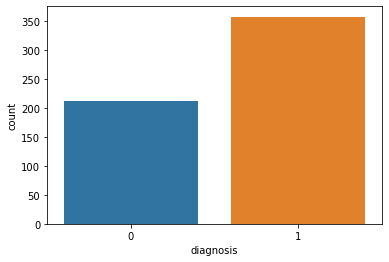

In [6]:
sns.countplot(x = df['diagnosis'])

In [7]:
#Train Test Split

In [8]:
x = df.drop('diagnosis',axis = 1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=100,stratify=y)

In [9]:
y_train.value_counts()

1    267
0    159
Name: diagnosis, dtype: int64

In [10]:
y_test.value_counts()

1    90
0    53
Name: diagnosis, dtype: int64

In [11]:
x_train.value_counts()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
6.981        13.43         43.79           143.5      0.11700            1
14.970       19.76         95.50           690.2      0.08421            1
14.960       19.10         97.03           687.3      0.08992            1
14.950       18.77         97.84           689.5      0.08138            1
14.920       14.93         96.45           686.9      0.08098            1
                                                                        ..
12.060       18.90         76.66           445.3      0.08386            1
12.050       22.72         78.75           447.8      0.06935            1
             14.63         78.04           449.3      0.10310            1
12.040       28.14         76.85           449.9      0.08752            1
28.110       18.47         188.50          2499.0     0.11420            1
Length: 426, dtype: int64

In [12]:
x_test.value_counts()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
9.295        13.90         59.96           257.8      0.13710            1
14.870       20.21         96.12           680.9      0.09587            1
14.410       19.73         96.03           651.0      0.08757            1
14.440       15.18         93.97           640.1      0.09970            1
14.450       20.22         94.49           642.7      0.09872            1
                                                                        ..
12.750       16.70         82.51           493.8      0.11250            1
12.760       13.37         82.29           504.1      0.08794            1
             18.84         81.87           496.6      0.09676            1
12.770       21.41         82.02           507.4      0.08749            1
25.730       17.46         174.20          2010.0     0.11490            1
Length: 143, dtype: int64

In [13]:
#Model-Training

In [14]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

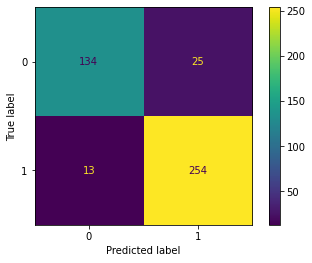

In [15]:
plot_confusion_matrix(logistic_model,x_train, y_train)#.................Trainig data

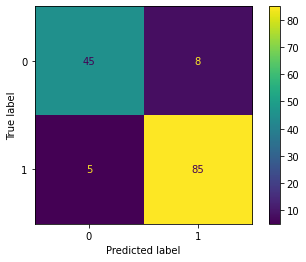

In [16]:
plot_confusion_matrix(logistic_model,x_test, y_test)#............Testing data

In [17]:
#Evaluation

In [18]:
#Testing Data
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[45  8]
 [ 5 85]]
****************************************************************************************
Accuracy : 0.9090909090909091
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.85      0.87        53
           1       0.91      0.94      0.93        90

    accuracy                           0.91       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



In [19]:
y_pred = logistic_model.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [20]:
#Training Data

In [21]:
y_pred_prob = logistic_model.predict_proba(x_test)
y_pred_prob

array([[2.43966658e-02, 9.75603334e-01],
       [5.10260924e-01, 4.89739076e-01],
       [3.53856804e-02, 9.64614320e-01],
       [1.15005970e-02, 9.88499403e-01],
       [7.29884496e-01, 2.70115504e-01],
       [1.15871709e-01, 8.84128291e-01],
       [5.86274691e-01, 4.13725309e-01],
       [9.31561262e-02, 9.06843874e-01],
       [5.61263036e-02, 9.43873696e-01],
       [1.41159767e-01, 8.58840233e-01],
       [1.21237202e-02, 9.87876280e-01],
       [7.73218757e-03, 9.92267812e-01],
       [5.19061872e-01, 4.80938128e-01],
       [3.11287725e-02, 9.68871228e-01],
       [6.35268843e-01, 3.64731157e-01],
       [1.28516092e-02, 9.87148391e-01],
       [1.17635784e-01, 8.82364216e-01],
       [9.92813404e-02, 9.00718660e-01],
       [4.62865813e-01, 5.37134187e-01],
       [7.69987957e-02, 9.23001204e-01],
       [3.11102258e-02, 9.68889774e-01],
       [1.89752011e-02, 9.81024799e-01],
       [6.71643055e-01, 3.28356945e-01],
       [4.32864872e-02, 9.56713513e-01],
       [1.699525

In [22]:
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[134  25]
 [ 13 254]]
****************************************************************************************
Accuracy : 0.9107981220657277
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       159
           1       0.91      0.95      0.93       267

    accuracy                           0.91       426
   macro avg       0.91      0.90      0.90       426
weighted avg       0.91      0.91      0.91       426



In [23]:
y_pred_prob = logistic_model.predict_proba(x_train)
# y_pred_prob[:,1]
fpr,tpr,thresh = roc_curve(y_train,y_pred_prob[:,1])
# tpr

Text(0.5, 1.0, 'Receiver Operating Characteristic Curve')

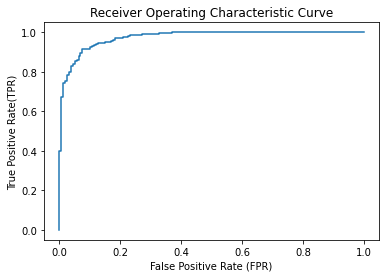

In [24]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curve")

In [25]:
#Testing on single Row-

In [26]:
x_test.iloc[4]

mean_radius         16.07000
mean_texture        19.65000
mean_perimeter     104.10000
mean_area          817.70000
mean_smoothness      0.09168
Name: 75, dtype: float64

In [27]:
project_data={'columns':list(x.columns)}
project_data 

{'columns': ['mean_radius',
  'mean_texture',
  'mean_perimeter',
  'mean_area',
  'mean_smoothness']}

In [28]:
column_names = x.columns
column_names

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'],
      dtype='object')

In [29]:
mean_radius   =  16.07
mean_texture  =  19.65
mean_perimeter=  104.10
mean_area     =  817.70
mean_smoothness = 0.09

In [30]:
test_array = np.zeros(x.shape[1])

test_array[0] = mean_radius
test_array[1] = mean_texture
test_array[2] = mean_perimeter
test_array[3] = mean_area
test_array[4] = mean_smoothness


print(np.around(test_array))


[ 16.  20. 104. 818.   0.]


In [31]:
column_names = x.columns
column_names

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'],
      dtype='object')

In [32]:
import pickle
with open('Logistic_Model.pkl','wb') as f:
    pickle.dump(logistic_model,f)

In [33]:
import json
with open("project_data.json",'w') as f:
    json.dump(project_data,f)